In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("http://math.ucla.edu/~dmenezes/co2_readings.csv", index_col=0)

In [ ]:
df.index

Int64Index([1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
            1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003],
           dtype='int64', name='Year')

In [ ]:
df.index = pd.to_datetime(df.index, format='%Y')

Text(0.5, 1.0, 'CO2 concentration 1959-2003')

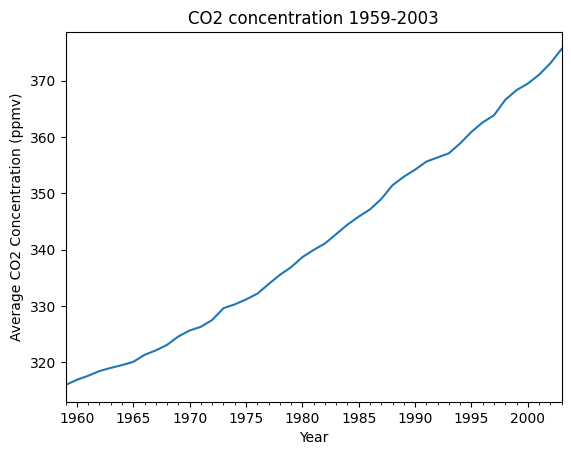

In [ ]:
import matplotlib.pyplot as plt 
df["Average CO2 Concentration (ppmv)"].plot()
plt.ylabel("Average CO2 Concentration (ppmv)")
plt.title("CO2 concentration 1959-2003")

In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
adfuller(df["Average CO2 Concentration (ppmv)"])

(3.816548025237233,
 1.0,
 2,
 42,
 {'1%': -3.596635636000432,
  '5%': -2.933297331821618,
  '10%': -2.6049909750566895},
 45.88503308674659)

In [ ]:
diff = df["Average CO2 Concentration (ppmv)"].diff().dropna()

In [ ]:
diff

Year
1960-01-01    0.91
1961-01-01    0.72
1962-01-01    0.83
1963-01-01    0.56
1964-01-01    0.50
1965-01-01    0.57
1966-01-01    1.25
1967-01-01    0.79
1968-01-01    0.98
1969-01-01    1.49
1970-01-01    1.05
1971-01-01    0.67
1972-01-01    1.20
1973-01-01    2.09
1974-01-01    0.68
1975-01-01    0.87
1976-01-01    1.02
1977-01-01    1.70
1978-01-01    1.64
1979-01-01    1.37
1980-01-01    1.78
1981-01-01    1.28
1982-01-01    1.14
1983-01-01    1.66
1984-01-01    1.69
1985-01-01    1.42
1986-01-01    1.28
1987-01-01    1.85
1988-01-01    2.45
1989-01-01    1.50
1990-01-01    1.25
1991-01-01    1.43
1992-01-01    0.74
1993-01-01    0.74
1994-01-01    1.76
1995-01-01    2.04
1996-01-01    1.68
1997-01-01    1.26
1998-01-01    2.74
1999-01-01    1.72
2000-01-01    1.17
2001-01-01    1.56
2002-01-01    2.04
2003-01-01    2.54
Name: Average CO2 Concentration (ppmv), dtype: float64

In [ ]:
adfuller(diff)

(-3.3237545218120323,
 0.01384946754947721,
 1,
 42,
 {'1%': -3.596635636000432,
  '5%': -2.933297331821618,
  '10%': -2.6049909750566895},
 50.65665193592976)

If we apply the augmented dickey-fuler test to the original series, we fail to reject the null hypothesis that the series has a unit root.

After we take differences we get a p-value of 0.01 which means that we reject the null hypothesis that the series has a unit root. 

In [ ]:
len(diff)

44

In [ ]:
train = diff[:39]

In [ ]:
test=diff[39:]

In [ ]:
train

Year
1960-01-01    0.91
1961-01-01    0.72
1962-01-01    0.83
1963-01-01    0.56
1964-01-01    0.50
1965-01-01    0.57
1966-01-01    1.25
1967-01-01    0.79
1968-01-01    0.98
1969-01-01    1.49
1970-01-01    1.05
1971-01-01    0.67
1972-01-01    1.20
1973-01-01    2.09
1974-01-01    0.68
1975-01-01    0.87
1976-01-01    1.02
1977-01-01    1.70
1978-01-01    1.64
1979-01-01    1.37
1980-01-01    1.78
1981-01-01    1.28
1982-01-01    1.14
1983-01-01    1.66
1984-01-01    1.69
1985-01-01    1.42
1986-01-01    1.28
1987-01-01    1.85
1988-01-01    2.45
1989-01-01    1.50
1990-01-01    1.25
1991-01-01    1.43
1992-01-01    0.74
1993-01-01    0.74
1994-01-01    1.76
1995-01-01    2.04
1996-01-01    1.68
1997-01-01    1.26
1998-01-01    2.74
Name: Average CO2 Concentration (ppmv), dtype: float64

In [ ]:
all_combs = [(p, q) for p in range(5) for q in range(5)]

In [ ]:
all_combs

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4)]

In [ ]:
#For the time series modelling
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Grid Search continued
combs = {}
aics = []
for (p, q) in all_combs:
    print (p, q)
    model = ARIMA(train, order=(p, 0, q)) # create all possible models
    model = model.fit()
    combs.update({model.aic : (p, 0, q)}) # store combinations
    aics.append(model.aic)

0 0
0 1
0 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

0 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


0 4


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


1 0
1 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

1 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


1 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


1 4


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


2 0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


2 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

2 2
2 3


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-

2 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


3 0
3 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


3 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-

3 3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

3 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


4 0
4 1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


4 2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

4 3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

4 4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
best_aic = min(aics)
# Model Creation and Forecasting
model = ARIMA(train, order=combs[best_aic])
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
best_aic

53.653860236930214

In [ ]:
resids = model.resid

In [ ]:
resids

Year
1960-01-01   -0.430971
1961-01-01   -0.431933
1962-01-01   -0.258136
1963-01-01   -0.533049
1964-01-01   -0.338206
1965-01-01   -0.358803
1966-01-01    0.293598
1967-01-01   -0.410566
1968-01-01    0.092509
1969-01-01    0.184332
1970-01-01   -0.408566
1971-01-01   -0.286528
1972-01-01    0.163399
1973-01-01    0.638177
1974-01-01   -0.899294
1975-01-01    0.102766
1976-01-01   -0.401842
1977-01-01    0.511103
1978-01-01    0.448329
1979-01-01   -0.161291
1980-01-01    0.083789
1981-01-01   -0.231746
1982-01-01    0.138022
1983-01-01    0.231596
1984-01-01   -0.061274
1985-01-01    0.157167
1986-01-01    0.007897
1987-01-01    0.224869
1988-01-01    0.787570
1989-01-01   -0.161580
1990-01-01   -0.260381
1991-01-01   -0.220789
1992-01-01   -0.491328
1993-01-01    0.054070
1994-01-01    0.511884
1995-01-01    0.270321
1996-01-01    0.276219
1997-01-01   -0.219775
1998-01-01    1.059927
dtype: float64

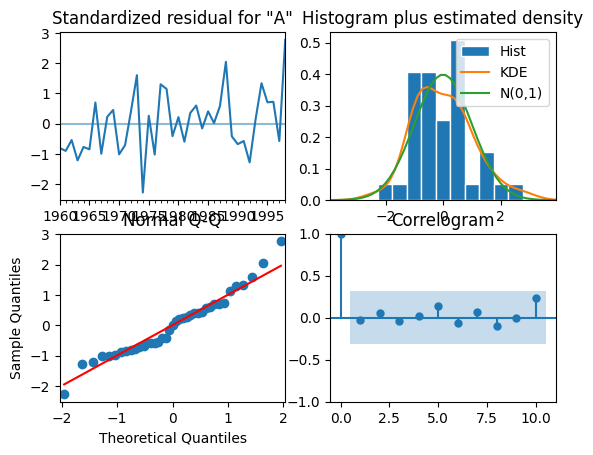

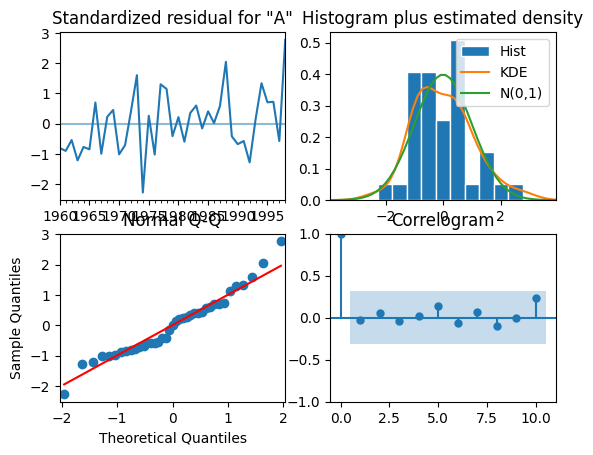

In [ ]:
model.plot_diagnostics()

The QQ plot indicates a straight line that lies on the line y=x

In [ ]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resids, lags=range(1,11))

,lb_stat,lb_pvalue
1,0.002767,0.958049
2,0.278561,0.869984
3,0.288467,0.962183
4,0.345551,0.986687
5,1.240863,0.940898
6,1.426609,0.964220
7,1.741624,0.972749
8,2.206547,0.974016
9,2.206897,0.987757
10,5.061037,0.887064


All of the p-values are well above 0.05; hence we can conclude that the residuals are uncorrelated.

In [ ]:
import numpy as np
train_mean = np.mean(train)

In [ ]:
ult = train[-1]

In [ ]:
ult

2.740000000000009

In [ ]:
pred = [ult]*5
np.mean((test - pred)**2)

1.0855400000000144

In [ ]:
pred = [train_mean]*5
np.mean((test - pred)**2)

0.47234331360948206

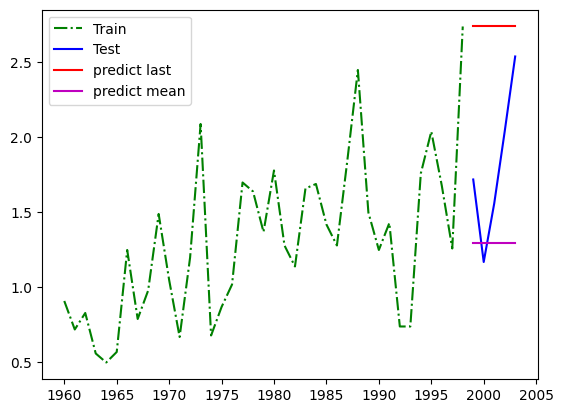

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(train, 'g-.', label='Train')
ax.plot(test, 'b-', label='Test')
ax.plot(test.index, np.array([ult]*5), 'r-', label="predict last")
ax.plot(test.index, np.array([train_mean]*5), 'm-', label="predict mean")
plt.legend()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
preds = []
for i in range(39, 44, 3):
  model = SARIMAX(diff[:i], order=(3,0,2))
  res = model.fit(disp=False)
  predictions = res.get_prediction(0, i + 3 - 1)
  pred = predictions.predicted_mean[-3:]
  preds.extend(pred)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency informatio

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:     Average CO2 Concentration (ppmv)   No. Observations:                   39
Model:                               ARIMA(3, 0, 2)   Log Likelihood                 -19.827
Date:                              Mon, 01 May 2023   AIC                             53.654
Time:                                      18:26:11   BIC                             65.299
Sample:                                  01-01-1960   HQIC                            57.832
                                       - 01-01-1998                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3410      0.194      6.921      0.000       0.961       1.721
ar.L1          0.2992      0.220      1.358      0.175      -0.133       0.731
ar.L2         -0.7984      0.099     -8.047      0.000      -0.993      -0.604
ar.L3          0.6217      0.201      3.093      0.002       0.228       1.016
ma.L1          0.2917      0.384      0.760      0.448      -0.461       1.045
ma.L2          0.9882      2.488      0.397      0.691      -3.888       5.864
sigma2         0.1408      0.318      0.443      0.658      -0.482       0.764
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.63
Prob(Q):                              0.83   Prob(JB):                         0.44
Heteroskedasticity (H):               2.25   Skew:                             0.48
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
preds

[2.381116089814958,
 1.8518377097425258,
 2.278400902072875,
 1.7399996318191593,
 1.091380188131186,
 1.0011315261778488]

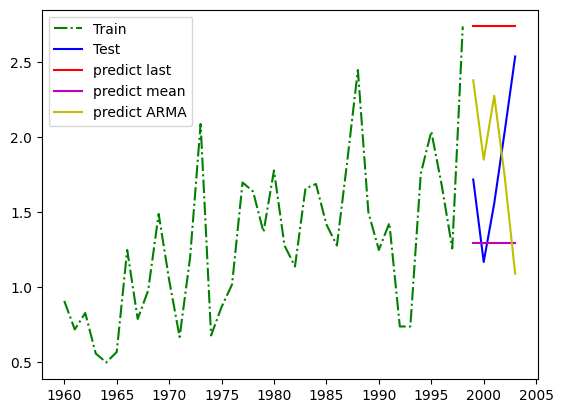

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(train, 'g-.', label='Train')
ax.plot(test, 'b-', label='Test')
ax.plot(test.index, np.array([ult]*5), 'r-', label="predict last")
ax.plot(test.index, np.array([train_mean]*5), 'm-', label="predict mean")
ax.plot(test.index, preds[:5], 'y-', label="predict ARMA")
plt.legend()

In [ ]:
np.mean((test - preds[:5])**2)

0.7213153165971686

Predicting using the mean has the best Mean squared error.  Predicting using the mean yields a MSE of 0.4 while using a ARMA prediction gives a prediction of 0.72 and using the last value gives a MSE of 1.08

In [120]:
pred_ult = [df["Average CO2 Concentration (ppmv)"][39]] + [ult]*5
pred_ult = np.cumsum(pred_ult)
pred_ult = pred_ult[1:]

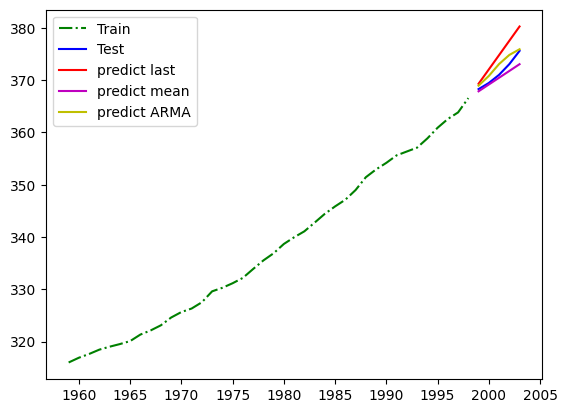

In [127]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df["Average CO2 Concentration (ppmv)"][:40], 'g-.', label='Train')
ax.plot(df["Average CO2 Concentration (ppmv)"][40:], 'b-', label='Test')
ax.plot(test.index, pred_ult, 'r-', label="predict last")
ax.plot(test.index, pred_mean, 'm-', label="predict mean")
ax.plot(test.index, pred_arma, 'y-', label="predict ARMA")
plt.legend()

In [121]:
pred_ult

array([369.32, 372.06, 374.8 , 377.54, 380.28])

In [123]:
pred_mean = [df["Average CO2 Concentration (ppmv)"][39]] + [train_mean]*5
pred_mean = np.cumsum(pred_mean)
pred_mean = pred_mean[1:]

In [126]:
pred_arma = [df["Average CO2 Concentration (ppmv)"][39]] + preds[:5]
pred_arma = np.cumsum(pred_arma)
pred_arma = pred_arma[1:]

In [128]:
test_undiff = df["Average CO2 Concentration (ppmv)"][40:]

In [130]:
np.mean((test_undiff - pred_ult)**2)

12.750240000000105

In [131]:
np.mean((test_undiff - pred_mean)**2)

1.7508856804735147

In [132]:
np.mean((test_undiff - pred_arma)**2)

1.9379909133682447

Using the mean of all data still yields a better prediction than trying to walk forward the ARMA prediction.  We get a Mean squared error of 1.75 with the mean of the train data, and a mean squared error of 1.93 with the walk forward.